This notebook presents the final results obtained using our forward modeling and inference pipeline. Since our model may differ from the C2Ray simulations, we incorporate model uncertainty into the data during inference. To achieve this, we add Gaussian noise to the pure 2D power spectra generated in the first notebook. The amplitude of this Gaussian noise is proportional to the power of the pure 2D power spectra (without telescope noise) multiplied by a fractional factor, i.e.,

$$
P(\tilde{P}_k \mid P_k) = \mathcal{N}\big(P_k, (r P_k)(r P_k)^T \big),
$$

where $\tilde{P}_k$ is the noisy power spectrum accounting for model uncertainty, $P_k$ is the pure power spectrum, and $r$ represents the fractional level of model uncertainty. We vary $r$ over the set \{0, 0.25, 0.5\}. Combined with the two inference methods (direct inference and the two-step approach), this yields six total scenarios. This notebook presents and compares all these results.

1. **Plot All Posterior Samples**: Present posterior corner plots for all six inference approaches applied to the two target power spectra.  
2. **Compare All Results**: Show comparison of the different approaches using two error bar plots (one for PS1 and one for PS2).  
3. **Compare Posteriors to Prior**: Similar to **Plot All Posterior Samples**, but with the prior distribution of $x_{\mathrm{HI}}$ included for reference.  
4. **Generate Submission Files**: Provide code to generate the three final submission files named Shuimu-Tianlai-A, Shuimu-Tianlai-B, and Shuimu-Tianlai-C.


In [5]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
import scipy
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches
from corner import corner

## Load All the posterior samples

In [23]:
xH_from_reion_ps1 = np.load('sdc_data/sbi_models/tmp_xH_samples/ps1_xH_from_rein_param_pos.npy')
xH_from_reion_ps2 = np.load('sdc_data/sbi_models/tmp_xH_samples/ps2_xH_from_rein_param_pos.npy')

xH_from_reion_ps1_sys_25 = np.load('sdc_data/sbi_models/tmp_xH_samples/ps1_xH_rein_param_pos_0.25_systematic.npy')
xH_from_reion_ps2_sys_25 = np.load('sdc_data/sbi_models/tmp_xH_samples/ps2_xH_rein_param_pos_0.25_systematic.npy')

xH_from_reion_ps1_sys_50 = np.load('sdc_data/sbi_models/tmp_xH_samples/ps1_xH_rein_param_pos_0.5_systematic.npy')
xH_from_reion_ps2_sys_50 = np.load('sdc_data/sbi_models/tmp_xH_samples/ps2_xH_rein_param_pos_0.5_systematic.npy')

In [24]:
xH_direct_ps1 = np.load('/home/dante/workspace/sdc/sdc_data/sbi_models/samples/ps1_direct_xH.npy')
xH_direct_ps2 = np.load('/home/dante/workspace/sdc/sdc_data/sbi_models/samples/ps2_direct_xH.npy')

xH_direct_ps1_sys_25 = np.load('sdc_data/sbi_models/systematics/systematics_samples/ps1_xH_direct_0.25_systematic.npy')
xH_direct_ps2_sys_25 = np.load('sdc_data/sbi_models/systematics/systematics_samples/ps2_xH_direct_0.25_systematic.npy')

xH_direct_ps1_sys_50 = np.load('sdc_data/sbi_models/systematics/systematics_samples/ps1_xH_direct_0.5_systematic.npy')
xH_direct_ps2_sys_50 = np.load('sdc_data/sbi_models/systematics/systematics_samples/ps2_xH_direct_0.5_systematic.npy')

## Plot all the posteriors

In [ ]:

def plot_corner(samples_50, samples_25, samples_0,title=None, with_prior=False):

    fig= None

    if with_prior:
        xH_prior = np.load('/home/dante/workspace/sdc/sdc_data/sbi_dataset/xH_z678.npy')
        fig = corner(xH_prior, 
        labels=[r'$xH_{z=6}$', r'$xH_{z=7}$', r'$xH_{z=8}$'], 
        show_titles=True, title_kwargs={"fontsize": 12}, hist_kwargs={'density': True},
        fill_contours=True, plot_datapoints=False, 
        levels=[0.68, 0.95], 
        bins=10,
        color='black')

    fig = corner(samples_50, 
             labels=[r'$xH_{z=6}$', r'$xH_{z=7}$', r'$xH_{z=8}$'], 
             show_titles=True, title_kwargs={"fontsize": 12}, hist_kwargs={'density': True},
             fill_contours=True, plot_datapoints=False, 
             levels=[0.68, 0.95], 
             bins=20,
             fig = fig,
             color='blue')

    fig = corner(samples_25, 
                labels=[r'$xH_{z=6}$', r'$xH_{z=7}$', r'$xH_{z=8}$'], 
                show_titles=True, title_kwargs={"fontsize": 12}, hist_kwargs={'density': True},
                fill_contours=True, 
                plot_datapoints=False, 
                levels=[0.68, 0.95], 
                bins=20,fig=fig,
                color='green')

    fig = corner(samples_0, labels=[r'$xH_{z=6}$', r'$xH_{z=7}$', r'$xH_{z=8}$'], 
                show_titles=True, title_kwargs={"fontsize": 12}, hist_kwargs={'density': True},
                fill_contours=True, 
                plot_datapoints=False, 
                levels=[0.68, 0.95], 
                bins=20,
                fig=fig,
                color='orange',range=[[0,1] for _ in range(3)])


    legend_handler = [
        mpatches.Patch(color='orange', label='No Model Uncertainty'),
        mpatches.Patch(color='green', label='25% Model Uncertainty'),
        mpatches.Patch(color='blue', label='50% Model Uncertainty'),
    ]
    if with_prior:
        legend_handler.append(mpatches.Patch(color='black', label='Prior'))

    fig.legend(handles=legend_handler, loc=(0.6, 0.8), fontsize=12)

    if title is not None:
        fig.suptitle(title, fontsize=16, y=1.1)

    return fig

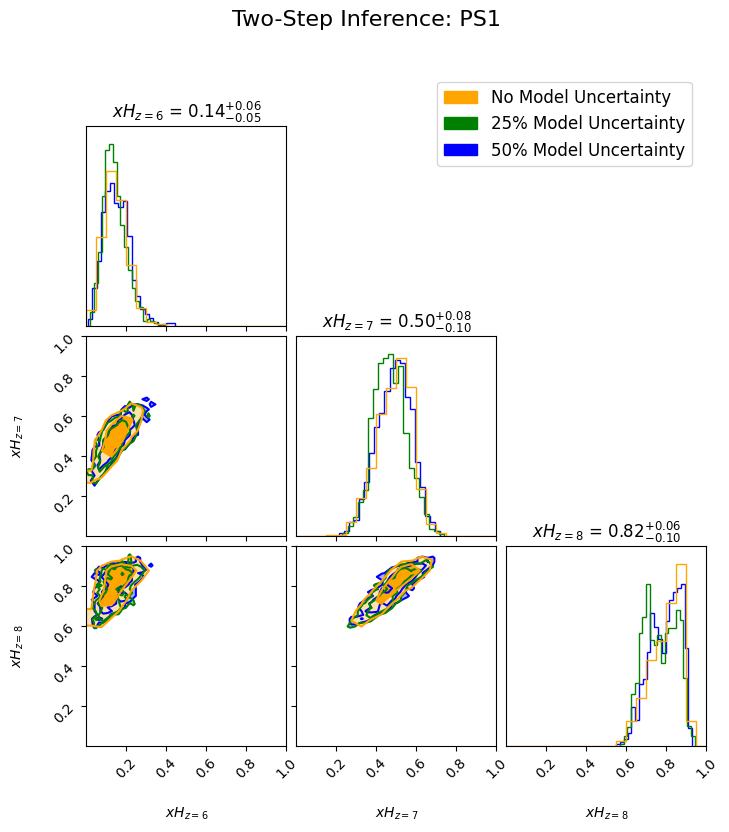

In [ ]:
fig = plot_corner(xH_from_reion_ps1_sys_50, xH_from_reion_ps1_sys_25, xH_from_reion_ps1, title='Two-Step Inference: PS1')

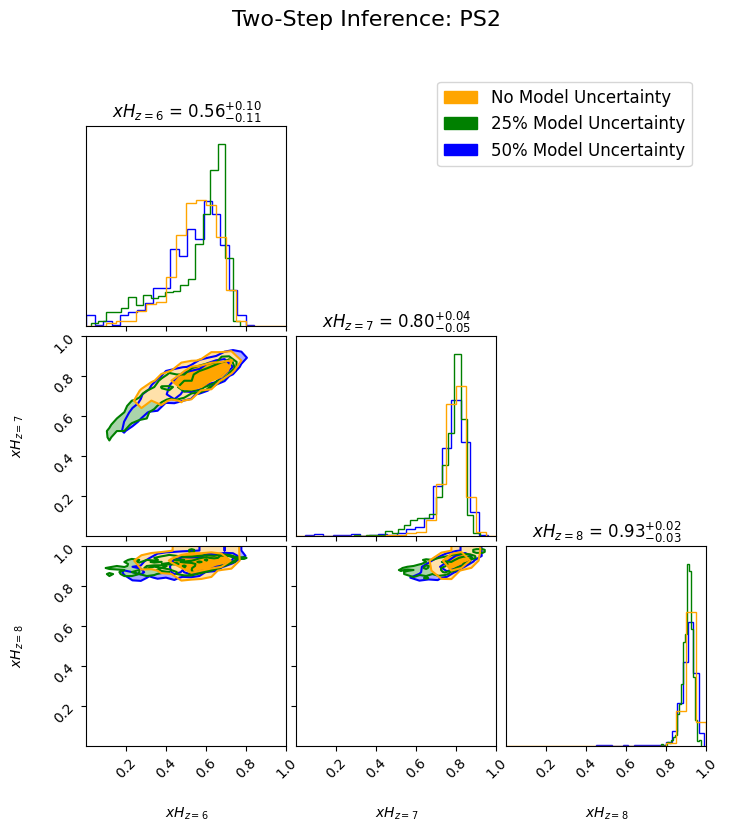

In [ ]:
fig = plot_corner(xH_from_reion_ps2_sys_50, xH_from_reion_ps2_sys_25, xH_from_reion_ps2, title='Two-Step Inference: PS2')

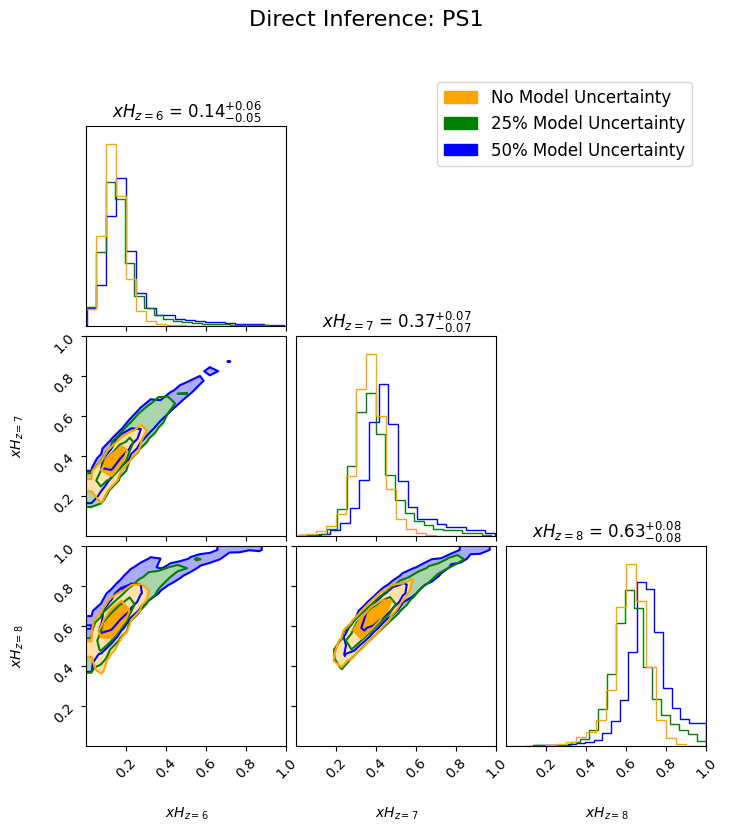

In [ ]:
fig = plot_corner(xH_direct_ps1_sys_50, xH_direct_ps1_sys_25, xH_direct_ps1, title='Direct Inference: PS1')

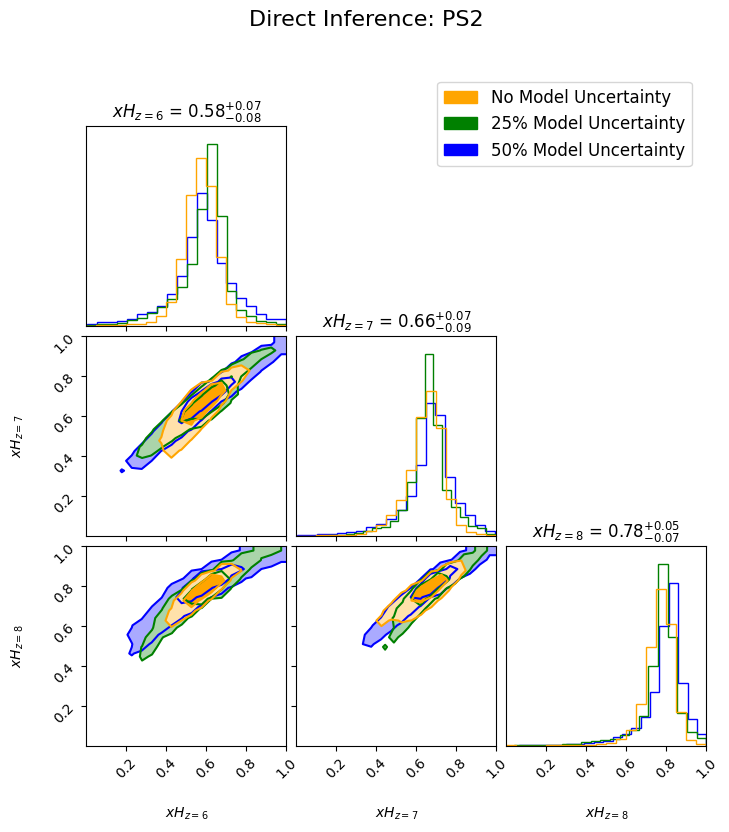

In [ ]:
fig =plot_corner(xH_direct_ps2_sys_50, xH_direct_ps2_sys_25, xH_direct_ps2, title='Direct Inference: PS2')

## Comparison of all Results

In [111]:
mean_xH_from_reion_ps1,std_xH_from_reion_ps1 = np.mean(xH_from_reion_ps1, axis=0), np.std(xH_from_reion_ps1, axis=0)
mean_xH_from_reion_ps2,std_xH_from_reion_ps2 = np.mean(xH_from_reion_ps2, axis=0), np.std(xH_from_reion_ps2, axis=0)

mean_xH_from_reion_ps1_sys_25,std_xH_from_reion_ps1_sys_25 = np.mean(xH_from_reion_ps1_sys_25, axis=0), np.std(xH_from_reion_ps1_sys_25, axis=0)
mean_xH_from_reion_ps2_sys_25,std_xH_from_reion_ps2_sys_25 = np.mean(xH_from_reion_ps2_sys_25, axis=0), np.std(xH_from_reion_ps2_sys_25, axis=0)

mean_xH_from_reion_ps1_sys_50,std_xH_from_reion_ps1_sys_50 = np.mean(xH_from_reion_ps1_sys_50, axis=0), np.std(xH_from_reion_ps1_sys_50, axis=0)
mean_xH_from_reion_ps2_sys_50,std_xH_from_reion_ps2_sys_50 = np.mean(xH_from_reion_ps2_sys_50, axis=0), np.std(xH_from_reion_ps2_sys_50, axis=0)

In [112]:
mean_xH_direct_ps1,std_xH_direct_ps1 = np.mean(xH_direct_ps1, axis=0), np.std(xH_direct_ps1, axis=0)
mean_xH_direct_ps2,std_xH_direct_ps2 = np.mean(xH_direct_ps2, axis=0), np.std(xH_direct_ps2, axis=0)

mean_xH_direct_ps1_sys_25,std_xH_direct_ps1_sys_25 = np.mean(xH_direct_ps1_sys_25, axis=0), np.std(xH_direct_ps1_sys_25, axis=0)
mean_xH_direct_ps2_sys_25,std_xH_direct_ps2_sys_25 = np.mean(xH_direct_ps2_sys_25, axis=0), np.std(xH_direct_ps2_sys_25, axis=0)

mean_xH_direct_ps1_sys_50,std_xH_direct_ps1_sys_50 = np.mean(xH_direct_ps1_sys_50, axis=0), np.std(xH_direct_ps1_sys_50, axis=0)
mean_xH_direct_ps2_sys_50,std_xH_direct_ps2_sys_50 = np.mean(xH_direct_ps2_sys_50, axis=0), np.std(xH_direct_ps2_sys_50, axis=0)

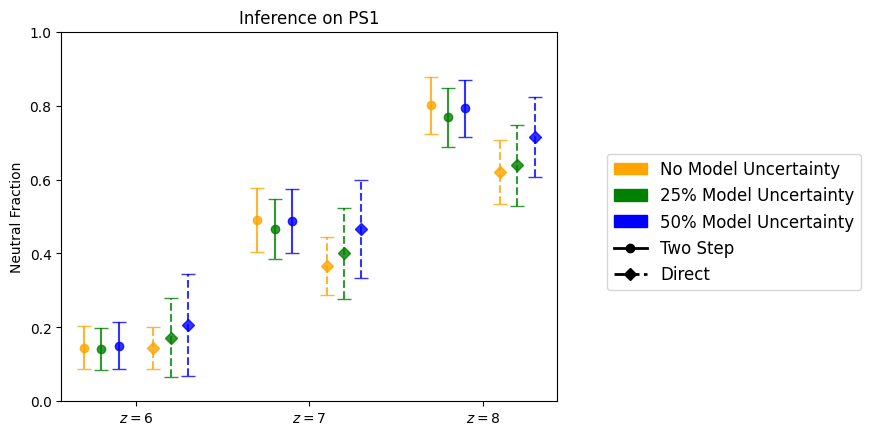

In [143]:
# plt.plot([6,7,8],mean_xH_from_reion_ps1, label='PS1', color='blue',fmt= 'o')
plt.errorbar([5.7,6.7,7.7],mean_xH_from_reion_ps1, yerr=std_xH_from_reion_ps1, color='orange',fmt= 'o',alpha=0.8, capsize=5)
plt.errorbar([5.8,6.8,7.8],mean_xH_from_reion_ps1_sys_25, yerr=std_xH_from_reion_ps1_sys_25, color='green',fmt= 'o',alpha=0.8, capsize=5)
plt.errorbar([5.9,6.9,7.9],mean_xH_from_reion_ps1_sys_50, yerr=std_xH_from_reion_ps1_sys_50, color='blue',fmt= 'o',alpha=0.8, capsize=5)

el1 = plt.errorbar([6.1,7.1,8.1],mean_xH_direct_ps1, yerr=std_xH_direct_ps1, color='orange',fmt= 'D',alpha=0.8, capsize=5)
el1[-1][0].set_linestyle('--')
el2 = plt.errorbar([6.2,7.2,8.2],mean_xH_direct_ps1_sys_25, yerr=std_xH_direct_ps1_sys_25, color='green',fmt= 'D',alpha=0.8, capsize=5)
el2[-1][0].set_linestyle('--')
el3 = plt.errorbar([6.3,7.3,8.3],mean_xH_direct_ps1_sys_50, yerr=std_xH_direct_ps1_sys_50, color='blue',fmt= 'D',alpha=0.8, capsize=5)
el3[-1][0].set_linestyle('--')

legend_handler = [
    mpatches.Patch(color='orange', label='No Model Uncertainty'),
    mpatches.Patch(color='green', label='25% Model Uncertainty'),
    mpatches.Patch(color='blue', label='50% Model Uncertainty'),
    plt.Line2D([0], [0], color='black',marker='o', lw=2, linestyle='-', label='Two Step'),
    plt.Line2D([0], [0], color='black',marker='D', lw=2, linestyle='--', label='Direct'),
]
plt.legend(handles=legend_handler, loc=(1.1, 0.3), fontsize=12)

#set axis label [6,7,8] to [z=6,z=7,z=8]
plt.xticks([6,7,8],[r'$z=6$',r'$z=7$',r'$z=8$'])
plt.ylabel('Neutral Fraction')
plt.ylim(0,1)
plt.title('Inference on PS1')
#save as pdf 
# plt.savefig('/home/dante/workspace/sdc/Figures/ps1_errorbar_plot.pdf', bbox_inches='tight')

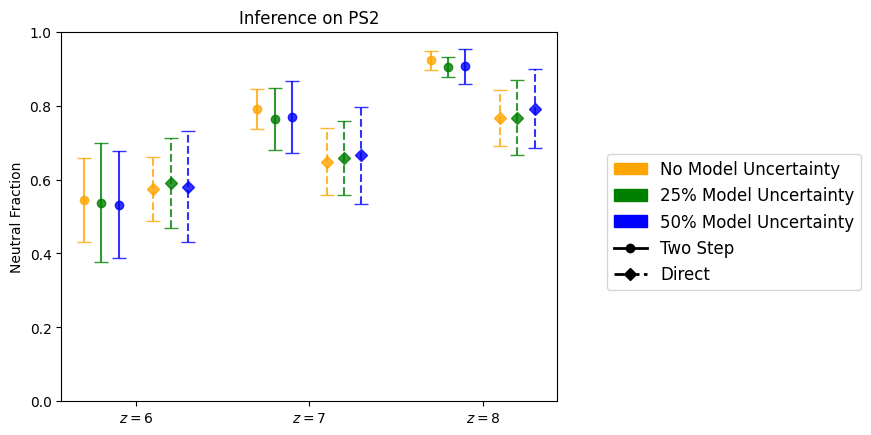

In [144]:
# plt.plot([6,7,8],mean_xH_from_reion_ps2, label='PS2', color='blue',fmt= 'o')
plt.errorbar([5.7,6.7,7.7],mean_xH_from_reion_ps2, yerr=std_xH_from_reion_ps2, color='orange',fmt= 'o',alpha=0.8, capsize=5)
plt.errorbar([5.8,6.8,7.8],mean_xH_from_reion_ps2_sys_25, yerr=std_xH_from_reion_ps2_sys_25, color='green',fmt= 'o',alpha=0.8, capsize=5)
plt.errorbar([5.9,6.9,7.9],mean_xH_from_reion_ps2_sys_50, yerr=std_xH_from_reion_ps2_sys_50, color='blue',fmt= 'o',alpha=0.8, capsize=5)

el1 = plt.errorbar([6.1,7.1,8.1],mean_xH_direct_ps2, yerr=std_xH_direct_ps2, color='orange',fmt= 'D',alpha=0.8, capsize=5)
el1[-1][0].set_linestyle('--')
el2 = plt.errorbar([6.2,7.2,8.2],mean_xH_direct_ps2_sys_25, yerr=std_xH_direct_ps2_sys_25, color='green',fmt= 'D',alpha=0.8, capsize=5)
el2[-1][0].set_linestyle('--')
el3 = plt.errorbar([6.3,7.3,8.3],mean_xH_direct_ps2_sys_50, yerr=std_xH_direct_ps2_sys_50, color='blue',fmt= 'D',alpha=0.8, capsize=5)
el3[-1][0].set_linestyle('--')

legend_handler = [
    mpatches.Patch(color='orange', label='No Model Uncertainty'),
    mpatches.Patch(color='green', label='25% Model Uncertainty'),
    mpatches.Patch(color='blue', label='50% Model Uncertainty'),
    plt.Line2D([0], [0], color='black',marker='o', lw=2, linestyle='-', label='Two Step'),
    plt.Line2D([0], [0], color='black',marker='D', lw=2, linestyle='--', label='Direct'),
]
plt.legend(handles=legend_handler, loc=(1.1, 0.3), fontsize=12)

#set axis label [6,7,8] to [z=6,z=7,z=8]
plt.xticks([6,7,8],[r'$z=6$',r'$z=7$',r'$z=8$'])
plt.ylabel('Neutral Fraction')
plt.ylim(0,1)
plt.title('Inference on PS2')
#save as pdf 
# plt.savefig('/home/dante/workspace/sdc/Figures/ps2_errorbar_plot.pdf', bbox_inches='tight')

## Compare posteriors to prior

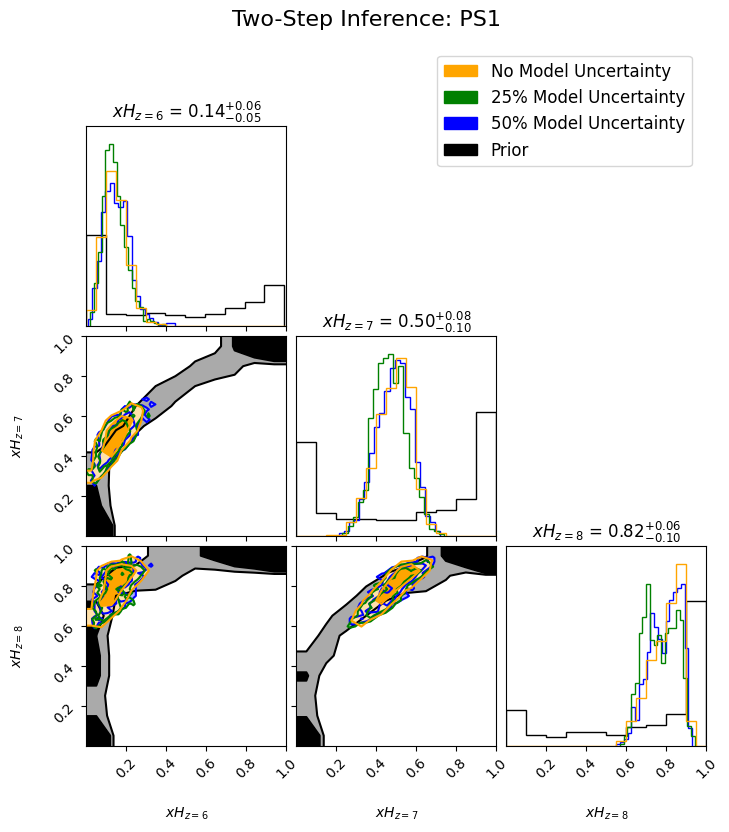

In [37]:
fig = plot_corner(xH_from_reion_ps1_sys_50, xH_from_reion_ps1_sys_25, xH_from_reion_ps1, title='Two-Step Inference: PS1',with_prior=True)
fig.savefig('/home/dante/workspace/sdc/Figures/ps1_two_step_corner_plot_with_prior.pdf', bbox_inches='tight')

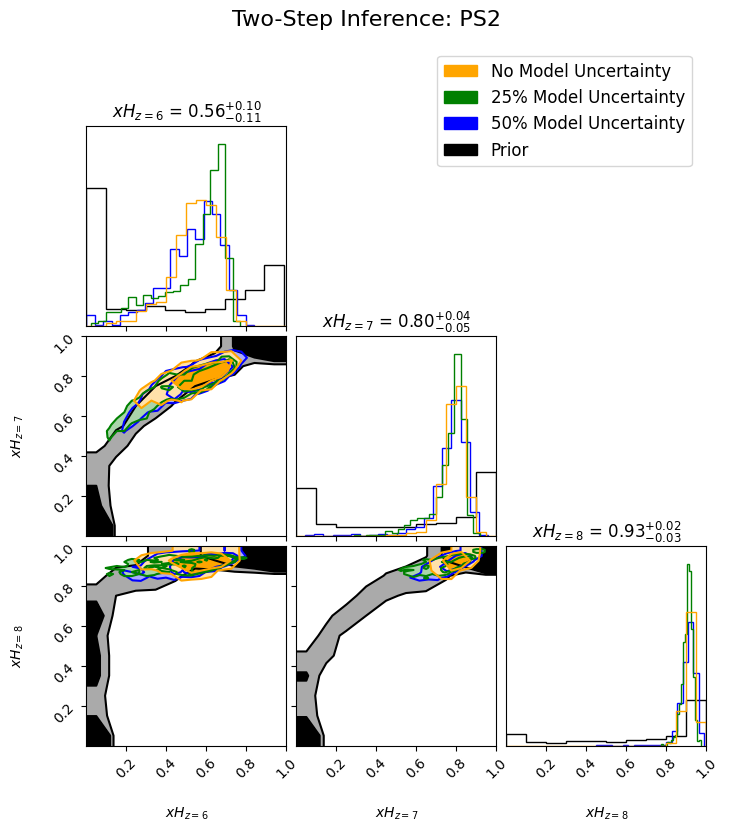

In [38]:
fig = plot_corner(xH_from_reion_ps2_sys_50, xH_from_reion_ps2_sys_25, xH_from_reion_ps2, title='Two-Step Inference: PS2',with_prior=True)
fig.savefig('/home/dante/workspace/sdc/Figures/ps2_two_step_corner_plot_with_prior.pdf', bbox_inches='tight')

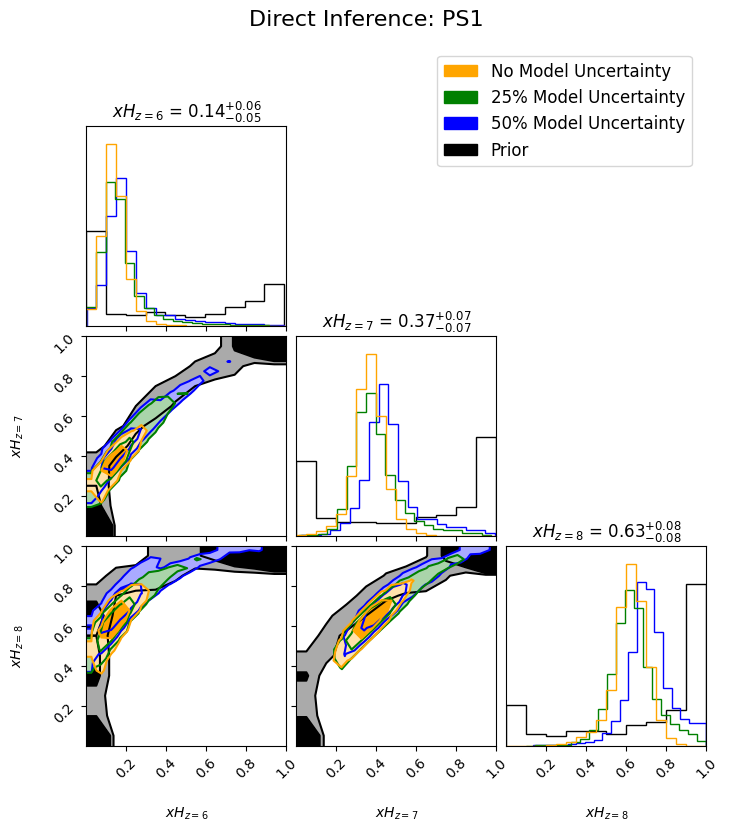

In [39]:
fig = plot_corner(xH_direct_ps1_sys_50, xH_direct_ps1_sys_25, xH_direct_ps1, title='Direct Inference: PS1',with_prior=True)
fig.savefig('/home/dante/workspace/sdc/Figures/ps1_direct_corner_plot_with_prior.pdf', bbox_inches='tight')

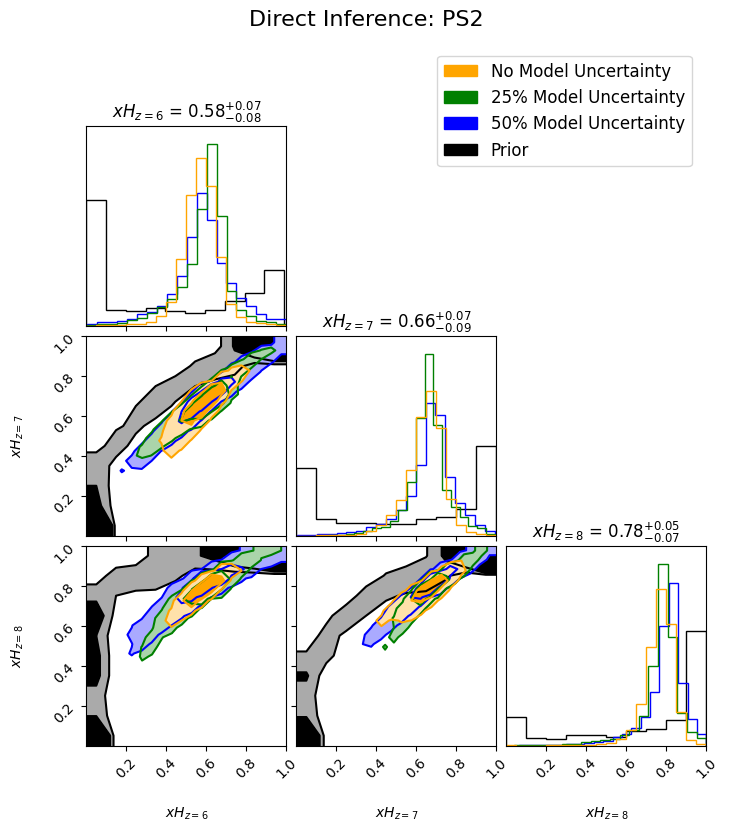

In [40]:
fig =plot_corner(xH_direct_ps2_sys_50, xH_direct_ps2_sys_25, xH_direct_ps2, title='Direct Inference: PS2',with_prior=True)
fig.savefig('/home/dante/workspace/sdc/Figures/ps2_direct_corner_plot_with_prior.pdf', bbox_inches='tight')

**Note that for PS2, the posterior from the direct approach does not align well with the prior. This discrepancy is primarily due to the irregular shape of the prior, which poses challenges during training.**

## Generate Submission Files

In [7]:
xH_from_reion_ps1 = np.load('sdc_data/sbi_models/tmp_xH_samples/ps1_xH_from_rein_param_pos.npy')
xH_from_reion_ps2 = np.load('sdc_data/sbi_models/tmp_xH_samples/ps2_xH_from_rein_param_pos.npy')

xH_from_reion_ps1_sys_25 = np.load('sdc_data/sbi_models/tmp_xH_samples/ps1_xH_rein_param_pos_0.25_systematic.npy')
xH_from_reion_ps2_sys_25 = np.load('sdc_data/sbi_models/tmp_xH_samples/ps2_xH_rein_param_pos_0.25_systematic.npy')

xH_from_reion_ps1_sys_50 = np.load('sdc_data/sbi_models/tmp_xH_samples/ps1_xH_rein_param_pos_0.5_systematic.npy')
xH_from_reion_ps2_sys_50 = np.load('sdc_data/sbi_models/tmp_xH_samples/ps2_xH_rein_param_pos_0.5_systematic.npy')

In [8]:
xH_direct_ps1 = np.load('/home/dante/workspace/sdc/sdc_data/sbi_models/samples/ps1_direct_xH.npy')
xH_direct_ps2 = np.load('/home/dante/workspace/sdc/sdc_data/sbi_models/samples/ps2_direct_xH.npy')

xH_direct_ps1_sys_25 = np.load('sdc_data/sbi_models/systematics/systematics_samples/ps1_xH_direct_0.25_systematic.npy')
xH_direct_ps2_sys_25 = np.load('sdc_data/sbi_models/systematics/systematics_samples/ps2_xH_direct_0.25_systematic.npy')

xH_direct_ps1_sys_50 = np.load('sdc_data/sbi_models/systematics/systematics_samples/ps1_xH_direct_0.5_systematic.npy')
xH_direct_ps2_sys_50 = np.load('sdc_data/sbi_models/systematics/systematics_samples/ps2_xH_direct_0.5_systematic.npy')

In [64]:
from scipy.stats import gaussian_kde
from astropy.io import fits
def to_kde_cube(samples):

    data_to_transform = samples.copy()
    data_to_transform = data_to_transform[:,[2,1,0]] # #reorder to z=8,7,6

    kde = gaussian_kde(data_to_transform.T)

    N = 100  # example grid size
    lin = np.linspace(0, 1, N, endpoint=False)
    X, Y, Z = np.meshgrid(lin, lin, lin, indexing='ij')
    grid = np.stack((X, Y, Z), axis=-1) 
    pos = grid.reshape(-1, 3)  # Reshape to (N^3, 3)
    #move pos to cell center
    pos = pos + 0.5/N

    pdf = kde(pos.T).reshape(*X.shape)

    pdf= pdf.astype(np.float64)
    pdf = pdf/np.sum(pdf)

    return pdf

def to_fits_format(pdf_cube,save_dir):


    # Open the FITS file
    hdulist = fits.open('/home/dante/workspace/sdc/sdc_data/taregt_data/3D_Gaussian_data_cube_100x100x100_test.fits')

    #create new fits 
    hdu_new = fits.PrimaryHDU(data=pdf_cube, header=hdulist[0].header.copy())
    hdu_new.writeto(save_dir, overwrite=False)


#### A team

We select three results from the six posteriors above. Using kernel density estimation (KDE), we smooth the samples to generate the final 100×100×100 posterior grid.

In [59]:
#a submission
xH_from_reion_ps1_sys_50 = np.load('sdc_data/sbi_models/tmp_xH_samples/ps1_xH_rein_param_pos_0.5_systematic.npy')
xH_from_reion_ps2_sys_50 = np.load('sdc_data/sbi_models/tmp_xH_samples/ps2_xH_rein_param_pos_0.5_systematic.npy')

pdf_ps1 = to_kde_cube(xH_from_reion_ps1_sys_50)
pdf_ps2 = to_kde_cube(xH_from_reion_ps2_sys_50)

to_fits_format(pdf_ps1,'/home/dante/workspace/sdc/sdc_data/taregt_data/submission_file/a_rein_to_xH_0.5/Shuimu-Tianlai-A_PS1.fits')
to_fits_format(pdf_ps2,'/home/dante/workspace/sdc/sdc_data/taregt_data/submission_file/a_rein_to_xH_0.5/Shuimu-Tianlai-A_PS2.fits')

In [55]:
np.sum(pdf_ps1), np.sum(pdf_ps2)

(0.9999999999999996, 1.0)

Text(0, 0.5, 'z=6')

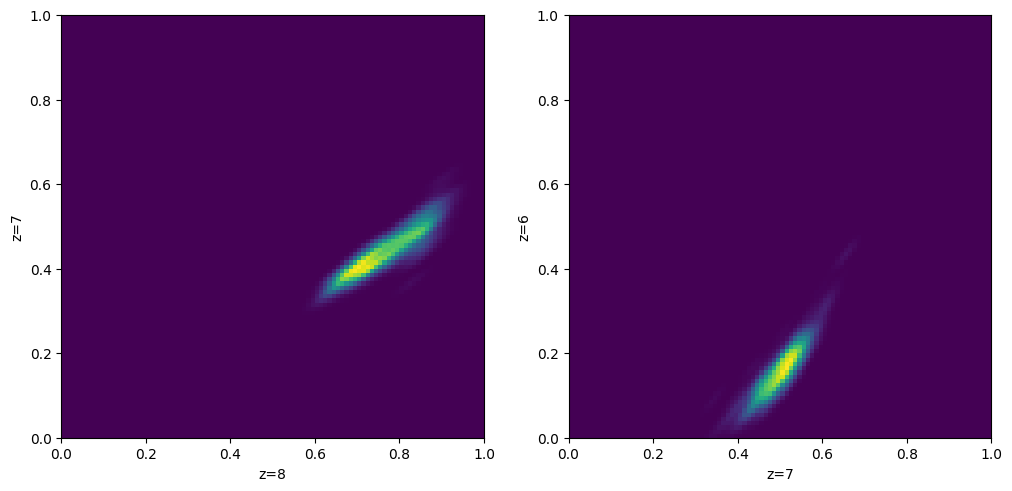

In [62]:
z_index = 10
fig,axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].imshow(pdf_ps1[:, :, z_index].T, origin='lower', extent=[0, 1, 0, 1], cmap='viridis')
axs[0].set_xlabel('z=8')
axs[0].set_ylabel('z=7')

x_index = 80
axs[1].imshow(pdf_ps1[x_index, :, :].T, origin='lower', extent=[0, 1, 0, 1], cmap='viridis')
axs[1].set_xlabel('z=7')
axs[1].set_ylabel('z=6')

Text(0, 0.5, 'z=6')

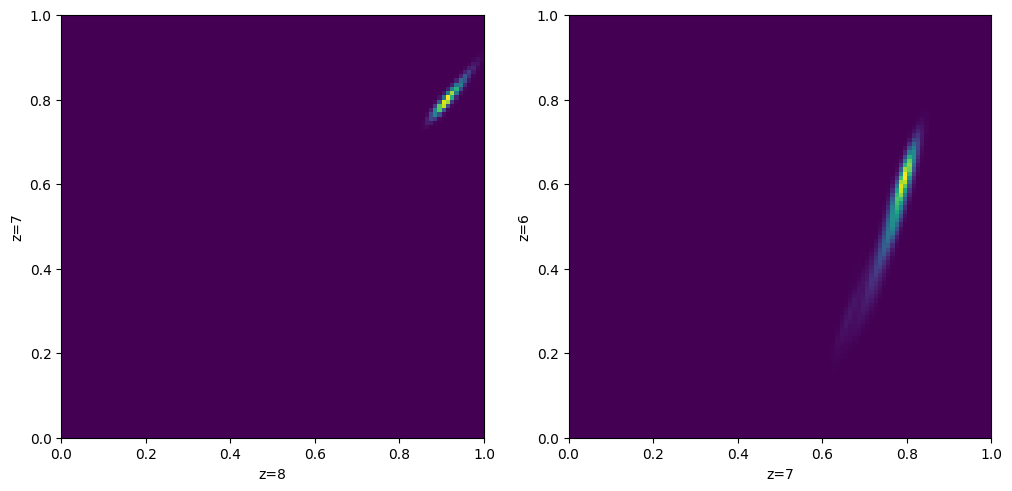

In [63]:
z_index = 60
fig,axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].imshow(pdf_ps2[:, :, z_index].T, origin='lower', extent=[0, 1, 0, 1], cmap='viridis')
axs[0].set_xlabel('z=8')
axs[0].set_ylabel('z=7')

x_index = 90
axs[1].imshow(pdf_ps2[x_index, :, :].T, origin='lower', extent=[0, 1, 0, 1], cmap='viridis')
axs[1].set_xlabel('z=7')
axs[1].set_ylabel('z=6')

#### B team

In [74]:
xH_direct_ps1_sys_25 = np.load('sdc_data/sbi_models/systematics/systematics_samples/ps1_xH_direct_0.25_systematic.npy')
xH_direct_ps2_sys_25 = np.load('sdc_data/sbi_models/systematics/systematics_samples/ps2_xH_direct_0.25_systematic.npy')

pdf_ps1 = to_kde_cube(xH_direct_ps1_sys_25)
pdf_ps2 = to_kde_cube(xH_direct_ps2_sys_25)

In [75]:
np.sum(pdf_ps1), np.sum(pdf_ps2)

(1.0, 0.9999999999999999)

Text(0, 0.5, 'z=6')

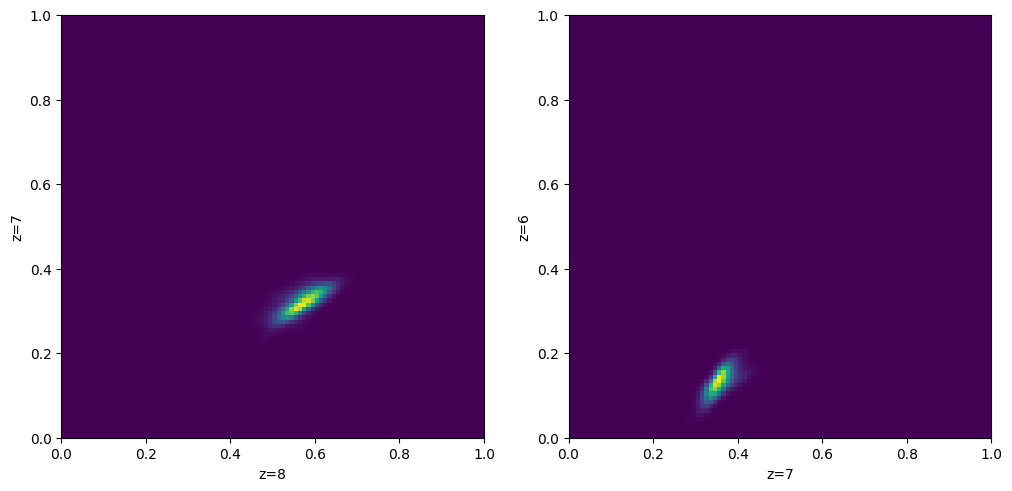

In [76]:
z_index = 10
fig,axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].imshow(pdf_ps1[:, :, z_index].T, origin='lower', extent=[0, 1, 0, 1], cmap='viridis')
axs[0].set_xlabel('z=8')
axs[0].set_ylabel('z=7')

x_index = 60
axs[1].imshow(pdf_ps1[x_index, :, :].T, origin='lower', extent=[0, 1, 0, 1], cmap='viridis')
axs[1].set_xlabel('z=7')
axs[1].set_ylabel('z=6')

Text(0, 0.5, 'z=6')

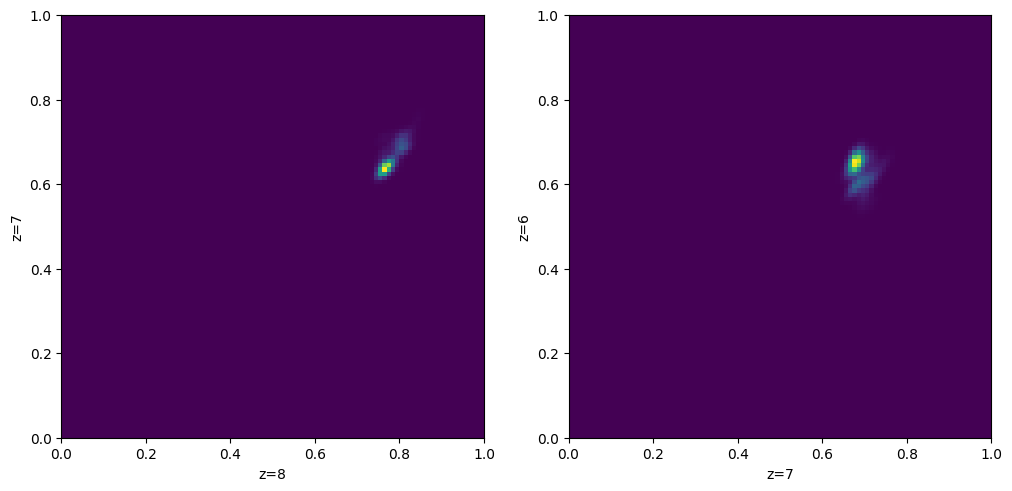

In [77]:
z_index = 60
fig,axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].imshow(pdf_ps2[:, :, z_index].T, origin='lower', extent=[0, 1, 0, 1], cmap='viridis')
axs[0].set_xlabel('z=8')
axs[0].set_ylabel('z=7')

x_index = 80
axs[1].imshow(pdf_ps2[x_index, :, :].T, origin='lower', extent=[0, 1, 0, 1], cmap='viridis')
axs[1].set_xlabel('z=7')
axs[1].set_ylabel('z=6')

#### C team

In [69]:
xH_direct_ps1_sys_50 = np.load('sdc_data/sbi_models/systematics/systematics_samples/ps1_xH_direct_0.5_systematic.npy')
xH_direct_ps2_sys_50 = np.load('sdc_data/sbi_models/systematics/systematics_samples/ps2_xH_direct_0.5_systematic.npy')

pdf_ps1 = to_kde_cube(xH_direct_ps1_sys_50)
pdf_ps2 = to_kde_cube(xH_direct_ps2_sys_50)

to_fits_format(pdf_ps1,'/home/dante/workspace/sdc/sdc_data/taregt_data/submission_file/c_direct_xH_0.50/Shuimu-Tianlai-C_PS1.fits')
to_fits_format(pdf_ps2,'/home/dante/workspace/sdc/sdc_data/taregt_data/submission_file/c_direct_xH_0.50/Shuimu-Tianlai-C_PS2.fits')

In [70]:
np.sum(pdf_ps1), np.sum(pdf_ps2)

(0.9999999999999998, 0.9999999999999998)

Text(0, 0.5, 'z=6')

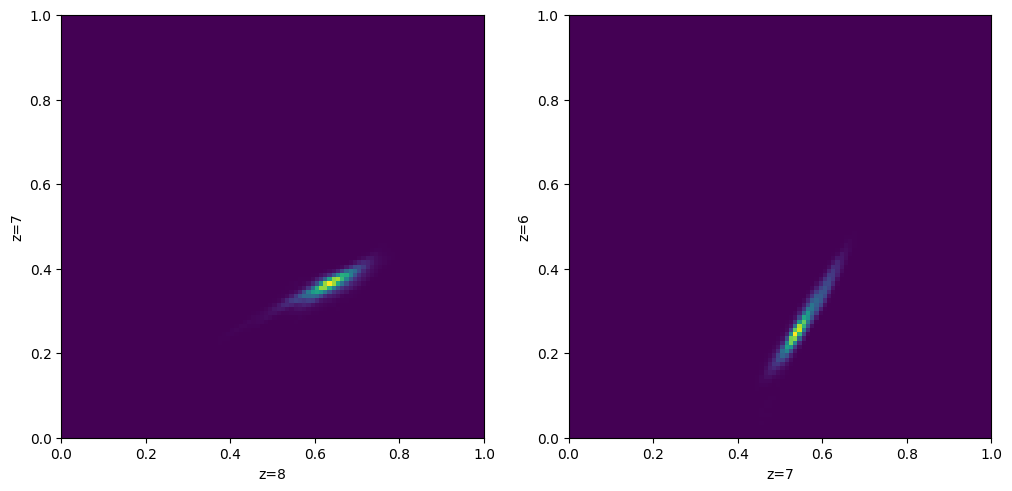

In [ ]:
z_index = 10
fig,axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].imshow(pdf_ps1[:, :, z_index].T, origin='lower', extent=[0, 1, 0, 1], cmap='viridis')
axs[0].set_xlabel('z=8')
axs[0].set_ylabel('z=7')

x_index = 60
axs[1].imshow(pdf_ps1[x_index, :, :].T, origin='lower', extent=[0, 1, 0, 1], cmap='viridis')
axs[1].set_xlabel('z=7')
axs[1].set_ylabel('z=6')

Text(0, 0.5, 'z=6')

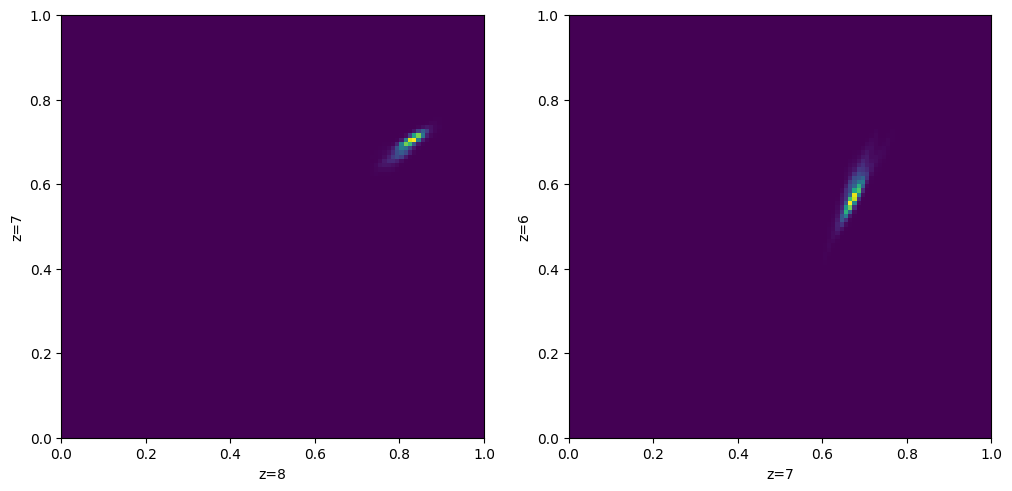

In [73]:
z_index = 60
fig,axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].imshow(pdf_ps2[:, :, z_index].T, origin='lower', extent=[0, 1, 0, 1], cmap='viridis')
axs[0].set_xlabel('z=8')
axs[0].set_ylabel('z=7')

x_index = 80
axs[1].imshow(pdf_ps2[x_index, :, :].T, origin='lower', extent=[0, 1, 0, 1], cmap='viridis')
axs[1].set_xlabel('z=7')
axs[1].set_ylabel('z=6')